In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [41]:
#由于鸢尾花数据太常见了，这里直接导入
from sklearn.datasets import load_iris
data = load_iris()
#鸢尾花数据集只有150个样本，每个样本只有4个特征
k= data.keys()
#data键对应的特征值  | target键对应 0-1-2 三个类别
# 花萼长度、花萼宽度、花瓣长度、花瓣宽度
x=data["data"]
y=data["target"] 
#三种鸢尾花分别是：setosa、versicolor、virginica

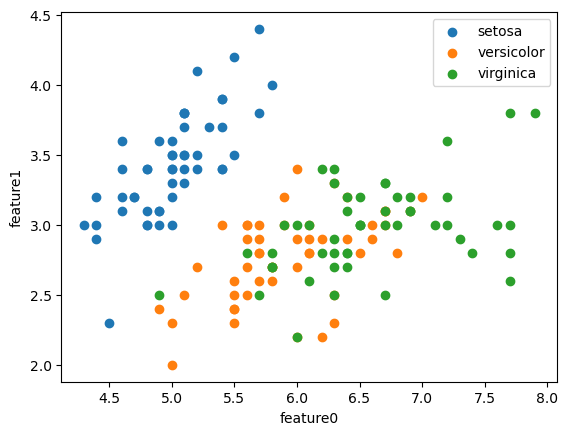

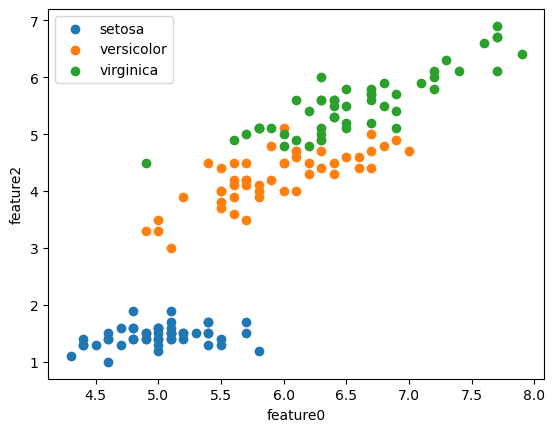

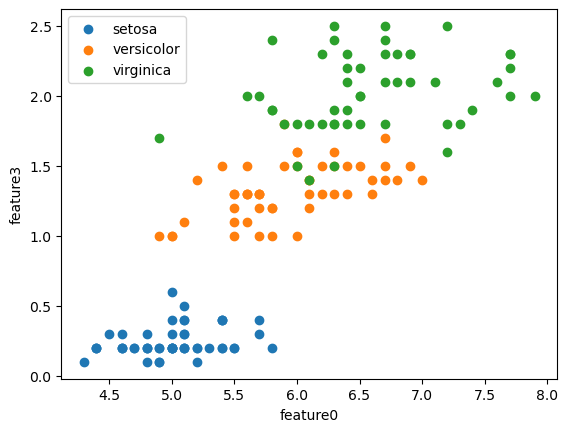

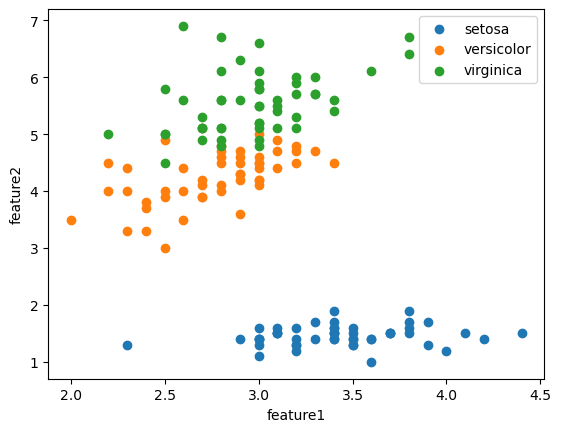

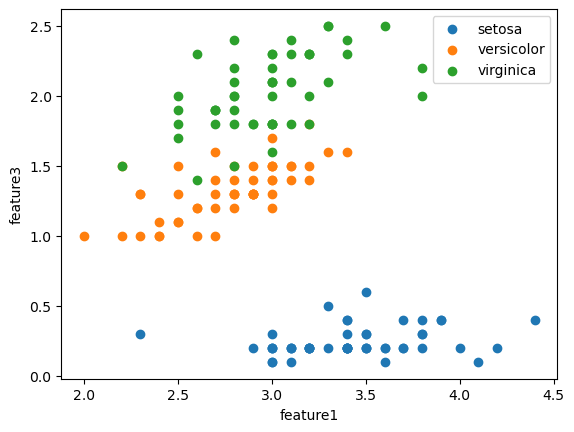

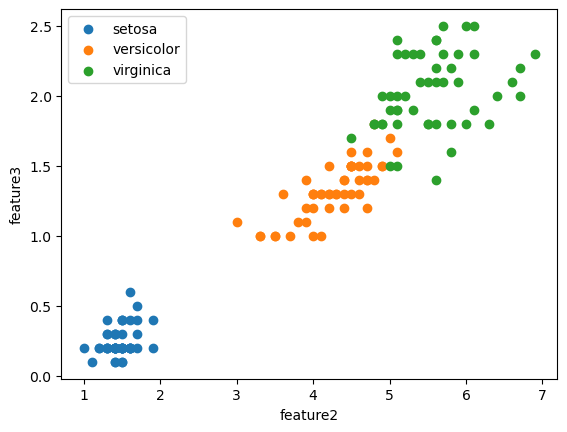

In [42]:
kind=[0,1,2,3]
for i in range(len(kind)-1):
    for j in range(i+1,len(kind)):
        plt.scatter(x[y==0,kind[i]],x[y==0,kind[j]],label="setosa")
        plt.scatter(x[y==1,kind[i]],x[y==1,kind[j]],label="versicolor")
        plt.scatter(x[y==2,kind[i]],x[y==2,kind[j]],label="virginica")
        plt.xlabel("feature"+str(kind[i]))
        plt.ylabel("feature"+str(kind[j]))
        plt.legend()
        plt.show()

In [20]:
from sklearn import svm
#线性核函数
clf1 = svm.SVC(kernel='linear',C=10000)
clf1.fit(x, y)
print(f"W:{clf1.coef_}") #k
print(f"b:{clf1.intercept_}") #截距
#评估
print(f"score:{clf1.score(x,y)}") #评估


W:[[-4.62585381e-02  5.21182800e-01 -1.00304462e+00 -4.64129785e-01]
 [-7.22312566e-03  1.78941210e-01 -5.38364588e-01 -2.92392628e-01]
 [ 1.57718306e+00  7.10780253e+00 -5.83502230e+00 -1.72879155e+01]]
b:[ 1.4528445   1.50771313 27.74913026]
score:0.9866666666666667


In [44]:
#高斯核函数
clf2 = svm.SVC(kernel='rbf',C=10000,gamma= 0.1)
clf2.fit(x, y)
#打印一些参数
#评估
print(f"score:{clf2.score(x,y)}") #评估

score:0.9933333333333333


In [53]:
#BP神经网络
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20, 3), random_state=1,)
clf3.fit(x, y)
#评估
print(f"score:{clf3.score(x,y)}") #评估

score:0.9933333333333333


In [35]:
#C4.5决策树
from sklearn import tree
clf4 = tree.DecisionTreeClassifier()
clf4.fit(x, y)
#评估
print(f"score:{clf4.score(x,y)}") #评估


score:1.0


In [75]:
from sklearn import datasets  # 导入库

diabetes = datasets.load_breast_cancer()  # 导入糖尿病数据
diabetes.keys()  # 查看数据集的键
x=diabetes["data"]  # 特征值
y=diabetes["target"]  # 类别


In [84]:
#线性核函数
clf1 = svm.SVC(kernel='linear',C=10000)
clf1.fit(x, y)
print(f"W:{clf1.coef_}") #k
print(f"b:{clf1.intercept_}") #截距
#评估
print(f"score:{clf1.score(x,y)}") #评估


W:[[ 1994.06134097   208.05976617   118.12907794   -26.18712465
  -1119.69181889  -346.01170235 -2671.83304911 -1683.9445138
  -1301.30776489   132.23063361   -49.55000065  2219.86055933
    842.41182205  -179.90687342  -361.93876281   777.23882091
   -287.76837605  -465.5052032   -348.4333899    147.96514874
   -747.76315334  -531.74144583  -185.93154346    12.60309204
  -1977.26927535  -454.06832131 -4313.87860078 -4062.03177
  -4785.67121289     7.96099121]]
b:[14582.48531616]
score:0.9630931458699473


In [83]:
#高斯核函数
clf2 = svm.SVC(kernel='rbf',C=10000)
clf2.fit(x, y)
#打印一些参数
#评估
print(f"score:{clf2.score(x,y)}") #评估

score:0.968365553602812


In [79]:
#BP神经网络
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
clf3.fit(x, y)
#评估
print(f"score:{clf3.score(x,y)}") #评估


score:0.9490333919156415


In [85]:
#C4.5决策树
from sklearn import tree
clf4 = tree.DecisionTreeClassifier()
clf4.fit(x, y)
#评估
print(f"score:{clf4.score(x,y)}") #评估

score:1.0


In [12]:
class SVM(w_num=4):
    def __init__(self, f_num):
        self.f_num = f_num
        self.w = np.zeros(f_num)
        self.b = 0
    def sign(self, x):
        y = np.dot(self.w, x) + self.b
        
    def fit(self,x,y):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(x)):
                fuc_d=y[d] * (np.dot(self.w, x[d]) + self.b) #函数间隔
                #几何间隔 = 函数间隔 / ||w||
                gep_d=fuc_d / abs(self.w) #几何间隔
                if  fuc_d<= 0:
                    self.w = self.w +  np.dot(y[d], x[d])
                    self.b = self.b +  y[d]
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
    def predict(self, x):
        return np.sign(np.dot(self.w, x) + self.b)
    def sign(self,x):
        return np.sign(np.dot(self.w, x) + self.b)

TypeError: SVM.__init_subclass__() takes no keyword arguments

In [9]:
abs(np.array([-1,-2]))

array([1, 2])

W:[[-1.  2.]]
b:[-2.]


分离超平面是 w*x+b
分类决策函数是 sign(w*x+b)
分离平面

In [19]:
clf.coef_

array([[-1.,  2.]])

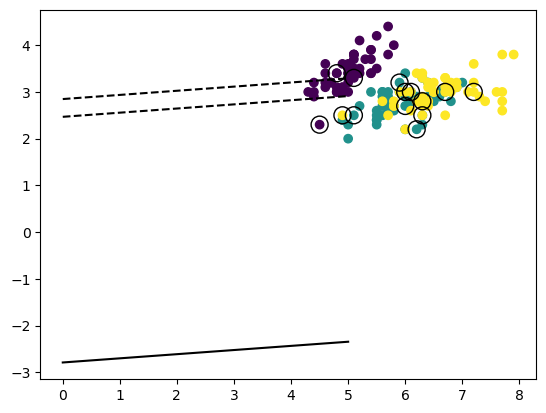

In [21]:
plt.scatter(x[:,0],x[:,1],c=y)
#我们就只在0-5这个区间展示作图
xaxis = np.linspace(0, 5)
w = clf.coef_[0]  #
a = -w[0] / w[1] #斜率
y_sep = a * xaxis - (clf.intercept_[0]) / w[1] #分离超平面
b = clf.support_vectors_[0] #支持向量1
yy_down = a * xaxis + (b[1] - a * b[0]) #
b = clf.support_vectors_[-1] #支持向量3
yy_up = a * xaxis + (b[1] - a * b[0])
plt.plot(xaxis, y_sep, 'k-') #分离超平面
plt.plot(xaxis, yy_down, 'k--') #分离超平面-上界
plt.plot(xaxis, yy_up, 'k--') #分离超平面-下界
plt.scatter (clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k')
plt.show()

In [62]:
clf.support_vectors_

array([[3., 2.],
       [1., 2.],
       [3., 3.]])

In [11]:
clf.support_vectors_

array([[3., 2.],
       [1., 2.],
       [3., 3.]])

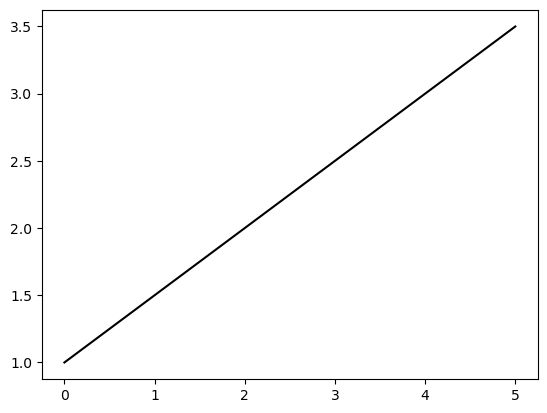